In [128]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [129]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [130]:
len(X_train)

60000

In [131]:
len(X_test)

10000

In [132]:
X_train[0].shape

(28, 28)

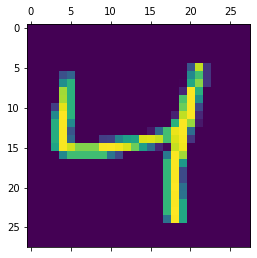

In [133]:
plt.matshow(X_train[2])

In [134]:
y_train[2]

4

In [135]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [136]:
X_train.shape

(60000, 28, 28)

In [137]:
X_train = X_train/255
X_test = X_test/255

In [138]:
x_train_flattened = X_train.reshape(len(X_train),28*28)
x_test_flattened = X_test.reshape(len(X_test),28*28)


In [139]:
x_train_flattened.shape, x_test_flattened.shape

((60000, 784), (10000, 784))

In [140]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [141]:
model = keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4685 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3041 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2834 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2667 - accuracy: 0.9255


In [142]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2659 - accuracy: 0.9252


[0.2659308910369873, 0.9251999855041504]

In [143]:
model.predict(x_test_flattened)

array([[2.5221607e-02, 2.4933036e-07, 6.5121956e-02, ..., 9.9979645e-01,
        9.3941800e-02, 6.5831923e-01],
       [3.6010256e-01, 4.0308768e-03, 9.9937361e-01, ..., 8.6458938e-13,
        1.2907548e-01, 1.5311701e-09],
       [4.1489452e-04, 9.9229276e-01, 6.4977777e-01, ..., 1.2528451e-01,
        3.6766726e-01, 5.1014341e-02],
       ...,
       [3.1333502e-06, 2.3552207e-06, 9.8533777e-04, ..., 1.8171221e-01,
        4.9157631e-01, 7.4852377e-01],
       [1.0419594e-04, 1.1310531e-04, 1.6206574e-04, ..., 2.9301838e-05,
        5.9243292e-01, 8.2901563e-05],
       [1.8859586e-02, 4.8056503e-10, 2.0422034e-01, ..., 1.6335987e-08,
        4.5975071e-04, 5.9730843e-07]], dtype=float32)

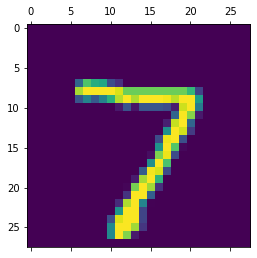

In [144]:
plt.matshow(X_test[0])

In [145]:
y_predicted = model.predict(x_test_flattened)
y_predicted[1]

array([3.6010256e-01, 4.0308768e-03, 9.9937361e-01, 4.3684295e-01,
       7.4841788e-10, 8.0691814e-01, 8.9607960e-01, 8.6458938e-13,
       1.2907548e-01, 1.5311701e-09], dtype=float32)

In [147]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [148]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [149]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    6,    5,    2,    2,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   7,    8,  922,   17,   11,    3,   13,   10,   37,    4],
       [   4,    0,   20,  932,    1,   17,    2,    9,   17,    8],
       [   1,    1,    4,    2,  924,    0,    9,    3,    9,   29],
       [  10,    2,    4,   40,   12,  763,   15,    5,   35,    6],
       [  12,    3,    6,    1,    8,   11,  913,    2,    2,    0],
       [   1,    5,   22,   10,   10,    0,    0,  943,    2,   35],
       [   6,    7,    8,   25,    9,   26,    9,    8,  867,    9],
       [  10,    7,    1,   10,   30,    7,    0,   20,    8,  916]])>

Text(69.0, 0.5, 'Truth')

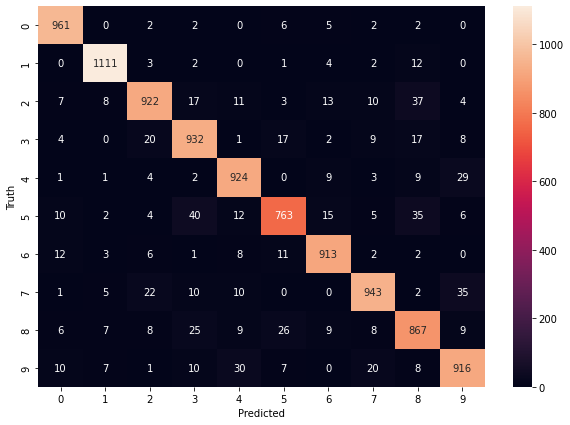

In [150]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [151]:
model = keras.Sequential([
    tf.keras.layers.Dense(101, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2697 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1212 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0846 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0652 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0509 - accuracy: 0.9841


In [152]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0805 - accuracy: 0.9757


[0.08048010617494583, 0.9757000207901001]

Text(69.0, 0.5, 'Truth')

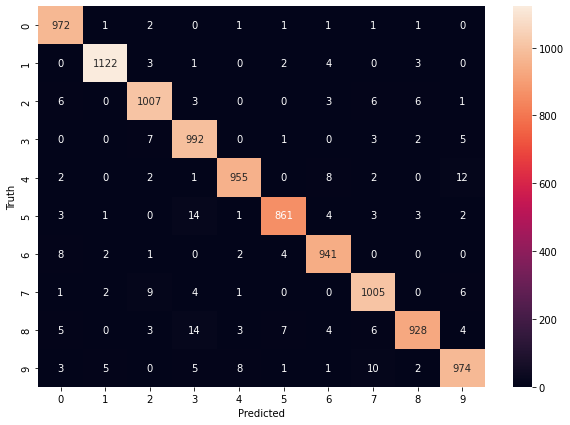

In [153]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [156]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2734 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1239 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0859 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0651 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0520 - accuracy: 0.9843


In [157]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0825 - accuracy: 0.9762


[0.08252064883708954, 0.9761999845504761]